In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install sckit-learn

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement sckit-learn (from versions: none)
ERROR: No matching distribution found for sckit-learn


In [4]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [10]:
train = pd.read_csv("C:\\Users\\abdul\\Desktop\\yapayzekalab\\train1.csv")
test = pd.read_csv("C:\\Users\\abdul\\Desktop\\yapayzekalab\\test1.csv")

In [11]:
label_encoder = LabelEncoder().fit(train.species)
labels = label_encoder.transform(train.species)
classes = list(label_encoder.classes_)


In [12]:
train = train.drop(["id" , "species"] ,  axis = 1)
test = test.drop(["id"] ,  axis =1)
nb_features = 192
nb_classes = len(classes)

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(train.values)
train = scaler.transform(train.values)

In [14]:
from sklearn.model_selection import train_test_split
X_train , X_valid , y_train , y_valid = train_test_split(train , labels , test_size= 0.1)

In [16]:
pip install tensorflow


   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/376.0 MB 1.1 MB/s eta 0:05:36
   ---------------------------------------- 1.0/376.0 MB 1.6 MB/s eta 0:03:59
   ---------------------------------------- 1.3/376.0 MB 1.4 MB/s eta 0:04:23
   ---------------------------------------- 1.6/376.0 MB 1.4 MB/s eta 0:04:33
   ---------------------------------------- 1.8/376.0 MB 1.4 MB/s eta 0:04:32
   ---------------------------------------- 2.1/376.0 MB 1.4 MB/s eta 0:04:31
   ---------------------------------------- 2.4/376.0 MB 1.4 MB/s eta 0:04:19
   ---------------------------------------- 2.6/376.0 MB 1.4 MB/s eta 0:04:23
   ---------------------------------------- 2.9/376.0 MB 1.4 MB/s eta 0:04:34
   ---------------------------------------- 2.9/376.0 MB 1.4 MB/s eta 0:04:34
   ----

In [21]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)

In [22]:
X_train = np.array(X_train).reshape(891 , 192 ,1)
X_valid = np.array(X_valid).reshape(99,192,1)

In [23]:
# IDESA modelinin oluşturulması
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv1D, Dropout, MaxPooling1D, Flatten

model = Sequential()
model.add(Conv1D(512,1,input_shape=(nb_features,1)))
model.add(Activation("relu"))
model.add(MaxPooling1D(2))
model.add(Conv1D(256,1))
model.add(MaxPooling1D(2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(2048, activation="relu"))
model.add(Dense(1024, activation="relu"))
model.add(Dense(nb_classes, activation="softmax"))

model.summary()


C:\Users\abdul\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 192, 512)       │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 192, 512)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 96, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 96, 256)        │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 48, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 48, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12288)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2048)           │    25,167,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 99)             │       101,475 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,499,875 (104.90 MB)

 Trainable params: 27,499,875 (104.90 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
# Ağın derlenmesi
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Modelin eğitilmesi
model.fit(X_train, y_train, epochs=15, validation_data=(X_valid, y_valid))


Epoch 1/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 272ms/step - accuracy: 0.1718 - loss: 3.9173 - val_accuracy: 0.7778 - val_loss: 1.0933
Epoch 2/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 7s 255ms/step - accuracy: 0.8198 - loss: 0.6790 - val_accuracy: 0.8687 - val_loss: 0.6033
Epoch 3/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 7s 247ms/step - accuracy: 0.9240 - loss: 0.3418 - val_accuracy: 0.9495 - val_loss: 0.2584
Epoch 4/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 7s 251ms/step - accuracy: 0.9756 - loss: 0.1236 - val_accuracy: 0.9394 - val_loss: 0.2834
Epoch 5/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 8s 276ms/step - accuracy: 0.9780 - loss: 0.0815 - val_accuracy: 0.9596 - val_loss: 0.2366
Epoch 6/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 8s 277ms/step - accuracy: 0.9864 - loss: 0.0576 - val_accuracy: 0.9091 - val_loss: 0.3355
Epoch 7/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 7s 253ms/step - accuracy: 0.9906 - loss: 0.0527 - val_accuracy: 0.9293 - val_loss: 0.2346
Epoch 8/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 7s 264ms/step - accuracy: 0.9891 - loss: 0.0367 - val_accuracy: 0

In [25]:
# Ortalama değerlerin gösterilmesi
print("Ortalama Eğitim Kaybı: ", np.mean(model.history.history["loss"]))
print("Ortalama Eğitim Başarımı: ", np.mean(model.history.history["accuracy"]))
print("Ortalama Doğrulama Kaybı: ", np.mean(model.history.history["val_loss"]))
print("Ortalama Doğrulama Başarımı: ", np.mean(model.history.history["val_accuracy"]))


Ortalama Eğitim Kaybı:  0.32085069095095
Ortalama Eğitim Başarımı:  0.9275720218817393
Ortalama Doğrulama Kaybı:  0.4307765702406565
Ortalama Doğrulama Başarımı:  0.9057239095369974


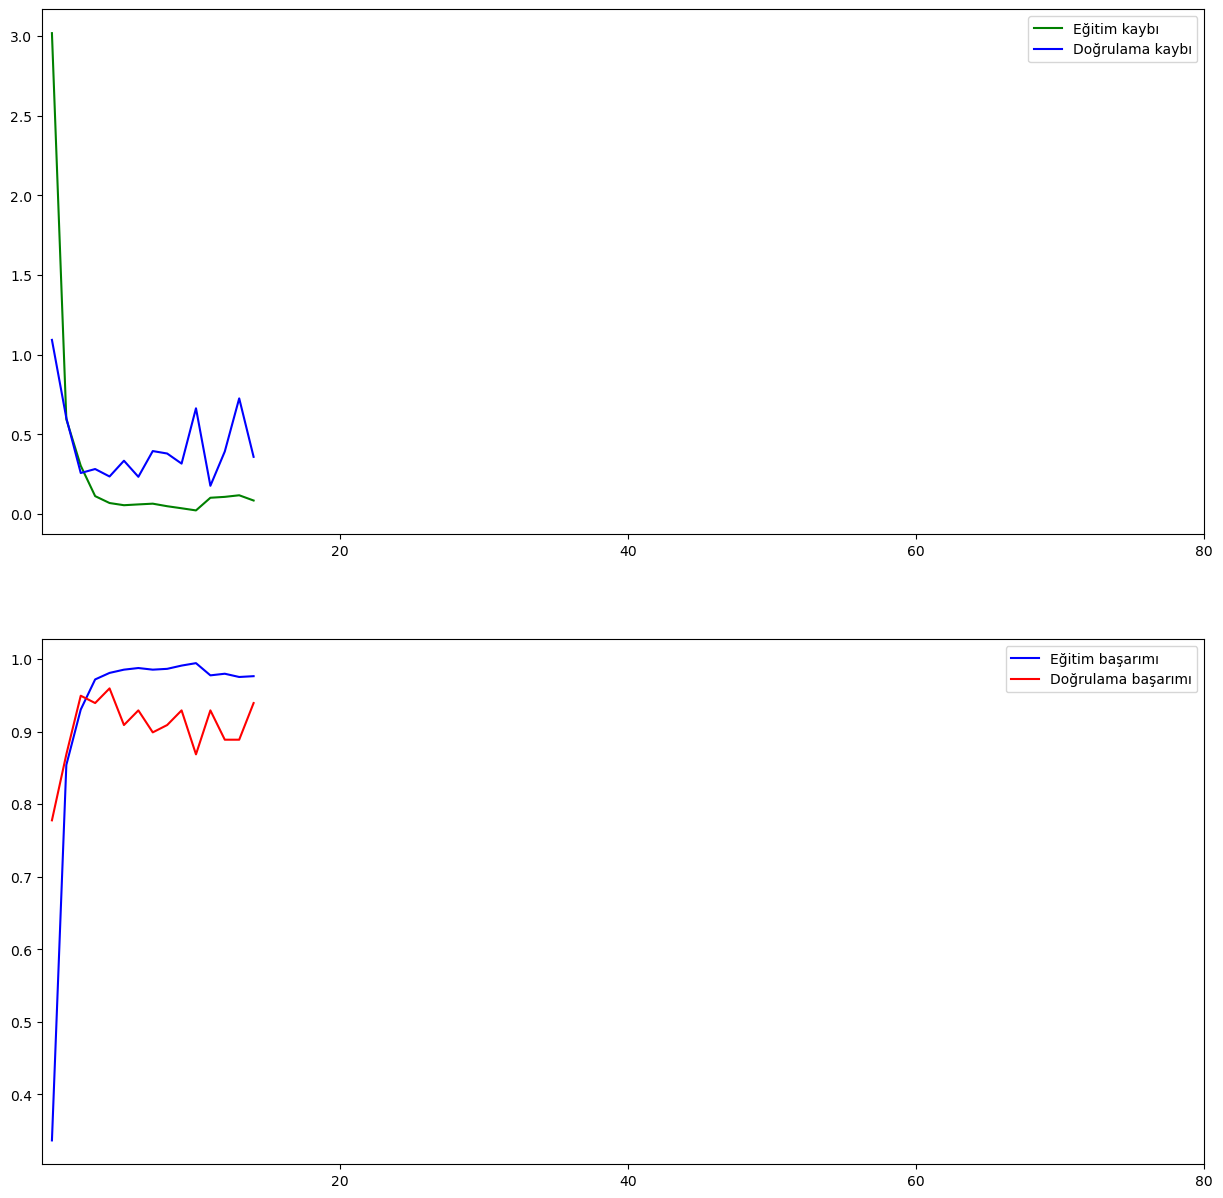

In [26]:
# Değerlerin grafik üzerinde gösterilmesi
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 15))
ax1.plot(model.history.history['loss'], color='g', label="Eğitim kaybı")
ax1.plot(model.history.history['val_loss'], color='b', label="Doğrulama kaybı")
ax1.set_xticks(np.arange(20, 100, 20))
ax1.legend()

ax2.plot(model.history.history['accuracy'], color='b', label="Eğitim başarımı")
ax2.plot(model.history.history['val_accuracy'], color='r', label="Doğrulama başarımı")
ax2.set_xticks(np.arange(20, 100, 20))
plt.legend()
plt.show()
